## Custom colormap
> https://matplotlib.org/3.3.0/tutorials/colors/colormap-manipulation.html

### Getting colormaps and accessing their values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#### Colormap instance: callable

In [2]:
viridis = cm.get_cmap("viridis", 8)
print(viridis(0.56))

(0.122312, 0.633153, 0.530398, 1.0)


In [3]:
viridis_a = cm.get_cmap("viridis", 8, alpha=0.2)
print(viridis_a(0.56))

TypeError: get_cmap() got an unexpected keyword argument 'alpha'

#### Listed Colormap

In [4]:
print("viridis.colors", viridis.colors)

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


In [5]:
print("viridis(range(8))", viridis(range(8)))

viridis(range(8)) [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


In [6]:
print("viridis(np.linspace(0, 1, 8))", viridis(np.linspace(0, 1, 8)))

viridis(np.linspace(0, 1, 8)) [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


In [7]:
# oversampling!
print("viridis(np.linspace(0, 1, 12))", viridis(np.linspace(0, 1, 12)))

viridis(np.linspace(0, 1, 12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


#### LinearSegmentedColormap

In [8]:
copper = cm.get_cmap("copper", 8)
print("copper(range(8))", copper(range(8)))
print("copper(np.linspace(0, 1, 8))", copper(np.linspace(0, 1, 8)))

copper(range(8)) [[0.         0.         0.         1.        ]
 [0.17647055 0.1116     0.07107143 1.        ]
 [0.35294109 0.2232     0.14214286 1.        ]
 [0.52941164 0.3348     0.21321429 1.        ]
 [0.70588219 0.4464     0.28428571 1.        ]
 [0.88235273 0.558      0.35535714 1.        ]
 [1.         0.6696     0.42642857 1.        ]
 [1.         0.7812     0.4975     1.        ]]
copper(np.linspace(0, 1, 8)) [[0.         0.         0.         1.        ]
 [0.17647055 0.1116     0.07107143 1.        ]
 [0.35294109 0.2232     0.14214286 1.        ]
 [0.52941164 0.3348     0.21321429 1.        ]
 [0.70588219 0.4464     0.28428571 1.        ]
 [0.88235273 0.558      0.35535714 1.        ]
 [1.         0.6696     0.42642857 1.        ]
 [1.         0.7812     0.4975     1.        ]]


#### Creating listed colormaps

In [9]:
# inverse operation of the above: supply a list or array of color specifications to ListedColormap

def plot_examples(colormaps):
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    
    fig, axs = plt.subplots(1, n, figsize=(n*2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

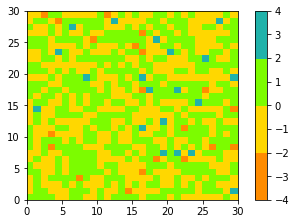

In [10]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])

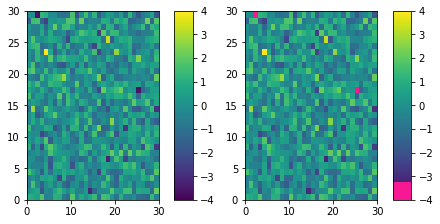

In [11]:
viridis = cm.get_cmap("viridis", 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

plot_examples([viridis, newcmp])

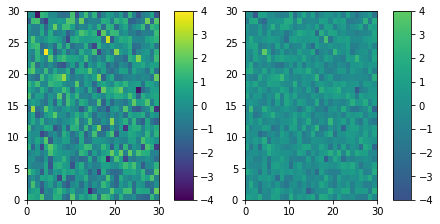

In [12]:
viridis_big = cm.get_cmap("viridis", 512)
newcmp = ListedColormap(viridis_big(np.linspace(0.25, 0.75, 256)))
plot_examples([viridis, newcmp])

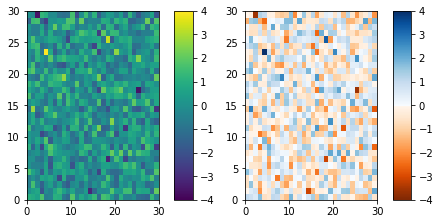

In [13]:
top = cm.get_cmap("Oranges_r", 128)
bottom = cm.get_cmap("Blues", 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name="OrangeBlue")

plot_examples([viridis, newcmp])

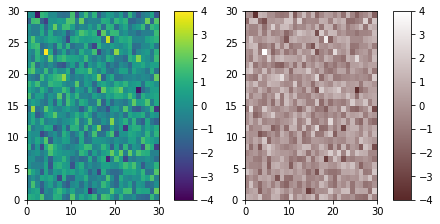

In [14]:
N = 256
vals = np.ones((N, 4))
vals[:, 0]= np.linspace(90/256, 1, N)
vals[:, 1]= np.linspace(40/256, 1, N)
vals[:, 2]= np.linspace(40/256, 1, N)
newcmp = ListedColormap(vals)
plot_examples([viridis, newcmp])

### Creating linear segmented colormaps

In [15]:
cdict = {"red": [[0.0, 0.0, 0.0], 
                 [0.5, 1.0, 1.0], 
                 [1.0, 1.0, 1.0]],
         "green": [[0.0, 0.0, 0.0], 
                   [0.25, 0.0, 0.0], 
                   [0.75, 1.0, 1.0], 
                   [1.0, 1.0, 1.0]],
         "blue": [[0.0, 0.0, 0.0], 
                   [0.5, 0.0, 0.0], 
                   [1.0, 1.0, 1.0]],
        }

In [16]:
def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap("testCmap", segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ["r", "g", "b"]
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle="--")
        
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    
    ax.set_xlabel("index")
    ax.set_ylabel("RGB")
    plt.show()

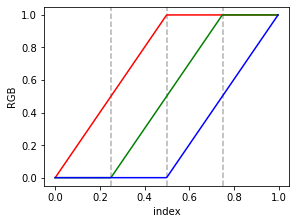

In [17]:
plot_linearmap(cdict)

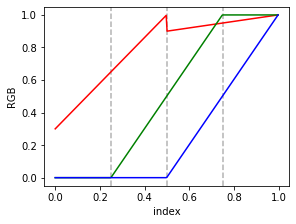

In [21]:
cdict['red'] = [[0.0,  0.0, 0.3],
                [0.5,  1.0, 0.9],
                [1.0,  1.0, 1.0]]
plot_linearmap(cdict)

#### Directly creating a segmented colormap from a list

In [22]:
colors = ["darkorange", "gold", "lawngreen", "lightseagreen"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

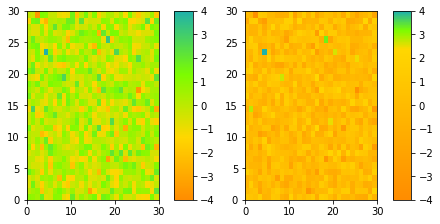

In [23]:
nodes = [0.0, 0.8, 0.9, 1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
plot_examples([cmap1, cmap2])